Step 1: Read and Display the Image


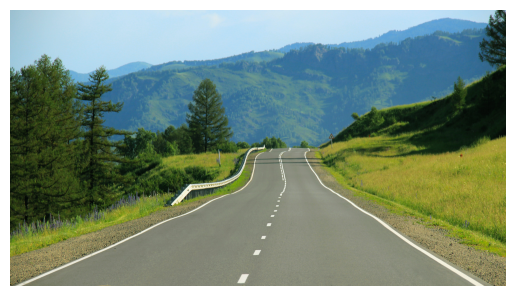

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image from the specified path
filename = '/content/imgsample1.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()


Step 2: Convert Image to Grayscale

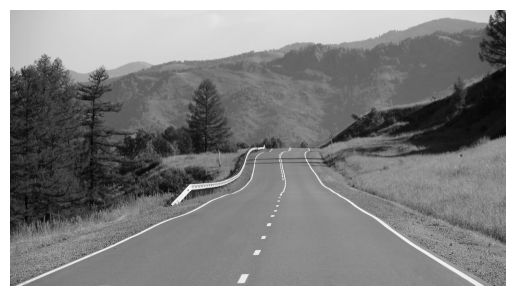

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()


Step 3: Apply Gaussian Filtering


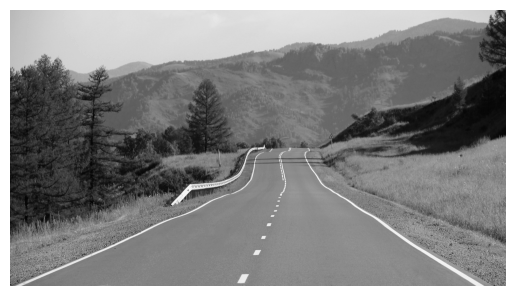

In [ ]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blur, cmap='gray')
plt.axis('off')
plt.show()


Step 4: Edge Detection using Canny


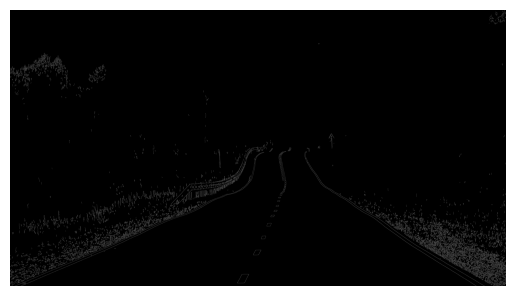

In [ ]:
edges = cv2.Canny(blur, 50, 150)
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()


Step 5: Identify Region of Interest

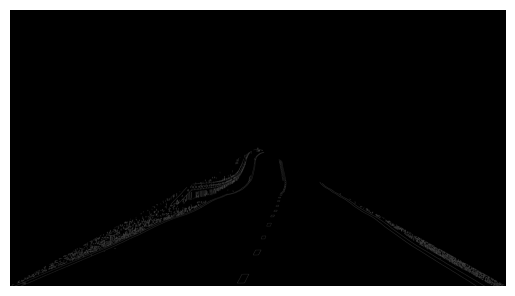

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, vertices, 255)
    masked = cv2.bitwise_and(img, mask)
    return masked

height, width = edges.shape
region = np.array([[
    (0, height),
    (width / 2, height / 2),
    (width, height),
]], np.int32)

masked_edges = region_of_interest(edges, region)
plt.imshow(masked_edges, cmap='gray')
plt.axis('off')
plt.show()


Step 6: Detect Straight Line Segments using Hough Transform

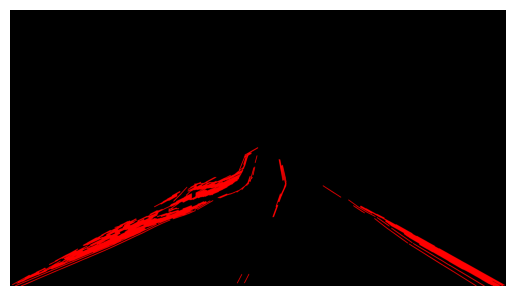

In [ ]:
lines = cv2.HoughLinesP(masked_edges, 1, np.pi/180, 50, minLineLength=100, maxLineGap=50)

line_img = np.zeros_like(img)

for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 10)

plt.imshow(line_img)
plt.axis('off')
plt.show()


Step 7: Extrapolate Lane Line Segments

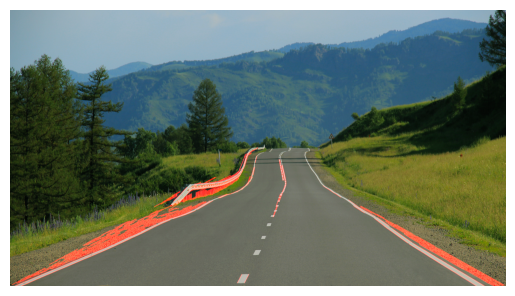

In [ ]:
def draw_lines(img, lines, color=[255, 0, 0], thickness=10):
    if lines is None:
        return
    img = np.copy(img)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
    return img

line_image = draw_lines(img, lines)
plt.imshow(line_image)
plt.axis('off')
plt.show()


Step 8: Combine Line Image with Original Image

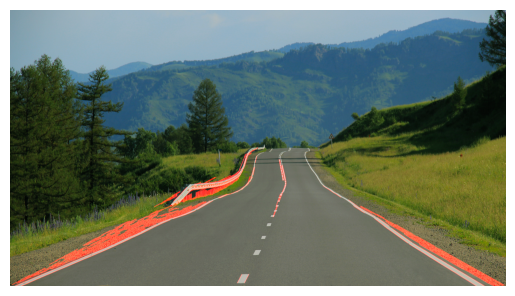

In [ ]:
result = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)
plt.imshow(result)
plt.axis('off')
plt.show()


________________________________________________________


*VIDEO I/P AND O/P*

In [ ]:
# Step 1: Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Specify the Video File Path
video_path = '/content/sample1.mp4'  # Change this path as needed


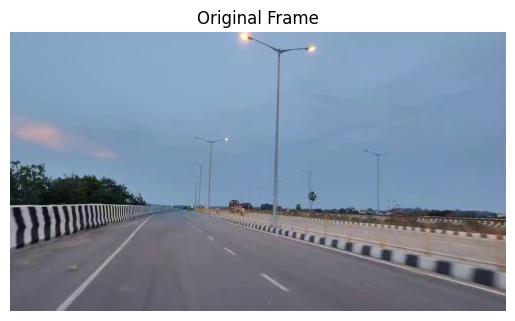

In [ ]:
# Read a single frame to visualize
cap = cv2.VideoCapture(video_path)
ret, frame = cap.read()
cap.release()

# Display the original frame
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Frame')
plt.show()


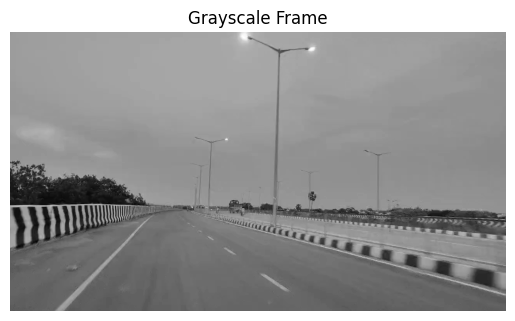

In [ ]:
# Convert to grayscale
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray_frame, cmap='gray')
plt.axis('off')
plt.title('Grayscale Frame')
plt.show()


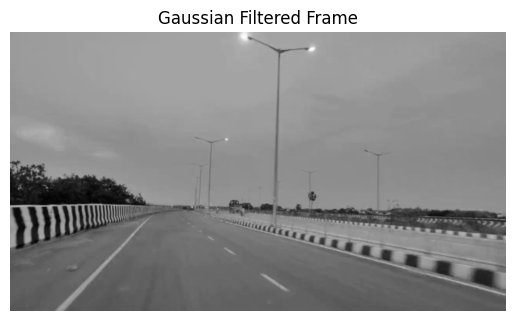

In [ ]:
# Apply Gaussian filtering
gaussian_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)

# Display the Gaussian filtered image
plt.imshow(gaussian_frame, cmap='gray')
plt.axis('off')
plt.title('Gaussian Filtered Frame')
plt.show()


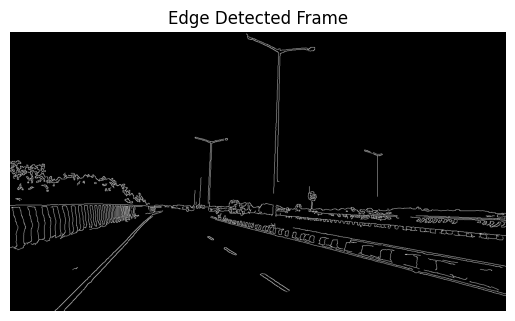

In [ ]:
# Perform edge detection using Canny
edges = cv2.Canny(gaussian_frame, 50, 150)

# Display the edges
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edge Detected Frame')
plt.show()


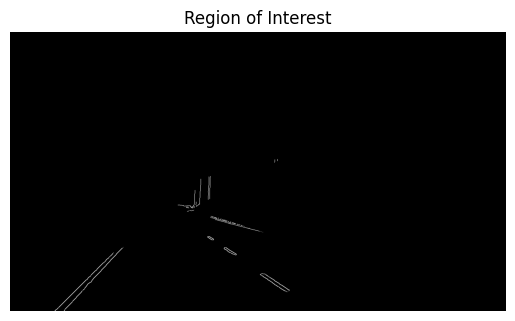

In [ ]:
def region_of_interest(img):
    height, width = img.shape
    # Adjust the polygon for a 'C' shaped road
    polygon = np.array([
        [(0, height),          # Bottom left
         (width, height),     # Bottom right
         (width * 0.27, height * 0.58),  # Right point
         (width * 0.55, height * 0.45)]   # Left point
    ], dtype=np.int32)  # Explicitly set data type to int32

    mask = np.zeros_like(img)
    cv2.fillPoly(mask, [polygon], 255)  # Fill the polygon in the mask
    return cv2.bitwise_and(img, mask)

# Apply region of interest
roi_edges = region_of_interest(edges)

# Display the ROI edges
plt.imshow(roi_edges, cmap='gray')
plt.axis('off')
plt.title('Region of Interest')
plt.show()


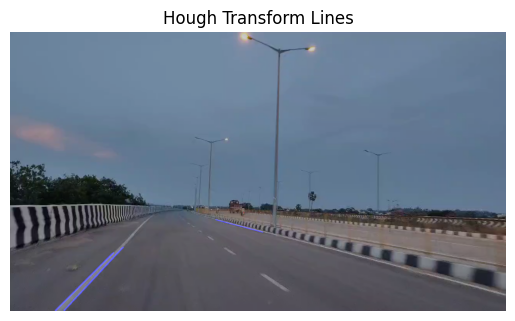

In [ ]:
# Perform Hough Transform to detect lines
lines = cv2.HoughLinesP(roi_edges, 1, np.pi / 180, threshold=50, minLineLength=100, maxLineGap=50)

# Create a blank image to draw lines
line_image = np.zeros_like(frame)

# Draw the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the lines on the original frame
combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 0)
plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Hough Transform Lines')
plt.show()


In [ ]:
# Step 8: Process the Video
output_path = '/content/output_video.mp4'  # Output video path
cap = cv2.VideoCapture(video_path)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Repeat the previous steps on each frame
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    gaussian_frame = cv2.GaussianBlur(gray_frame, (5, 5), 0)
    edges = cv2.Canny(gaussian_frame, 50, 150)
    roi_edges = region_of_interest(edges)

    lines = cv2.HoughLinesP(roi_edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=50)

    line_image = np.zeros_like(frame)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 0)
    out.write(combo_image)

# Release resources
cap.release()
out.release()

# Download the output video
from google.colab import files
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>